Sepsis is a serious condition in which the body responds improperly to an infection. The infection-fighting processes turn on the body, causing the organs to work poorly. Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that can damage the lungs, kidneys, liver and other organs. When the damage is severe, it can lead to mortality.

Sepsis can progress to septic shock when certain changes in the circulatory system, the body's cells and how the body uses energy become more abnormal. Septic shock is more likely to cause death than sepsis is.

Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by a dysregulated response to infection. In septic shock, there is critical reduction in tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, and liver, can occur.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

**import os**: This line imports the 'os' module, which provides a way of using operating system-dependent functionality.

**import warnings**: This line imports the 'warnings' module, allowing us to handle or suppress warning messages during the code execution.

**warnings.filterwarnings('ignore')**: This line sets a filter to ignore warning messages. It's a good practice to suppress warnings that might not be critical to our analysis.

**import numpy as np**: This line imports the 'numpy' library and assigns it the alias 'np'. 'numpy' is a powerful library for numerical computing and handling arrays and matrices.

**import pandas as pd**: This line imports the 'pandas' library and assigns it the alias 'pd'. 'pandas' is widely used for data manipulation and analysis, providing powerful data structures like DataFrames.

**import matplotlib.pyplot as plt**: This line imports the 'matplotlib.pyplot' module and assigns it the alias 'plt'. 'matplotlib' is a popular plotting library in Python, and 'pyplot' provides a MATLAB-like interface for creating visualizations.

import seaborn as sns: This line imports the 'seaborn' library and assigns it the alias 'sns'. 'seaborn' is another data visualization library built on top of 'matplotlib', offering additional high-level plotting functions and attractive styles.

In [ ]:
#rEADING THE DATA(LOADING)

data=pd.read_csv("sepsis_status.csv")

dictionary = pd.read_csv("Parameter _detail_Dictionary.csv")


In [ ]:
icu_df=data.copy()
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [ ]:
icu_df["septic_shock"].value_counts()

0    83798
1     7915
Name: septic_shock, dtype: int64

In [ ]:
dictionary

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,Sepsis_status,None,binary,Whether the patient having sepsis during this ...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
...,...,...,...,...,...,...
183,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with no...,1
184,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with an...,1
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


In [ ]:
dictionary.Category.value_counts()

labs                         60
vitals                       52
APACHE covariate             28
demographic                  16
labs blood gas               16
APACHE comorbidity            8
identifier                    3
APACHE prediction             2
APACHE grouping               2
GOSSIS example prediction     1
Name: Category, dtype: int64

By calling dictionary['Category'].value_counts(), you are obtaining the count of occurrences of each unique value in the 'Category' column of the dictionary. The result will be a pandas Series, where each unique value in the 'Category' column becomes an index, and the corresponding count of occurrences becomes the value.

In [ ]:
def selectCategory(df,category):
    return df[df.Category==category]

GOSSIS score refers to the Global Open Source Severity of Illness Score which gives an idea about how severe a patient is. We can try comparing this particular feature with the hospital_death column to if there is any correlation between the 2 columns.

In [ ]:
cols=selectCategory(dictionary,"GOSSIS example prediction")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
187,GOSSIS example prediction,pred,None,numeric,"Example mortality prediction, shared as a 'bas...",0.000921


In [ ]:
cols=selectCategory(dictionary,"APACHE grouping")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


In [ ]:
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
icu_df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
septic_shock                      0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

The code icu_df.isnull().sum() is used to check the number of missing values in each column of the DataFrame icu_df.

In [ ]:
icu_df.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min         84619
h1_bilirubin_max         84619
h1_lactate_max           84369
h1_lactate_min           84369
h1_albumin_max           83824
                         ...  
icu_type                     0
pre_icu_los_days             0
readmission_status           0
apache_post_operative        0
encounter_id                 0
Length: 186, dtype: int64

sort the results in descending order based on the count of missing values.

In [ ]:
high_null=icu_df.isnull().sum()/len(icu_df)

In [ ]:
high_null.sort_values(ascending=False)

h1_bilirubin_min         0.922650
h1_bilirubin_max         0.922650
h1_lactate_max           0.919924
h1_lactate_min           0.919924
h1_albumin_max           0.913982
                           ...   
icu_type                 0.000000
pre_icu_los_days         0.000000
readmission_status       0.000000
apache_post_operative    0.000000
encounter_id             0.000000
Length: 186, dtype: float64

We have mainly two categories of missing data- one having more than 50% missing other having less than 25% missing

In [ ]:
high_missing=high_null[high_null>=0.50].index


The code high_missing=high_null[high_null>=0.50].index creates a pandas Index object containing the column names of the DataFrame icu_df where the proportion of missing values is equal to or greater than 50%.

In [ ]:
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [ ]:
len(high_missing)

74

In [ ]:
icu_df.shape

(91713, 186)

The code icu_df.shape is used to determine the dimensions of the DataFrame icu_df, which provides the number of rows and columns in the DataFrame.

In [ ]:
# dropping the high missing (more than 50% missing values)
icu=icu_df.drop(high_missing, axis=1)

In [ ]:
icu.shape

(91713, 112)

In [ ]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 78.4+ MB


In [ ]:
icu.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
septic_shock                      0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 112, dtype: int64

In [ ]:
icu.isnull().any().sum()

101

The code icu.isnull().any().sum() is used to count the number of columns in the DataFrame icu that contain at least one missing value (NaN).

In [ ]:
icu.isnull().any(axis=1).sum()

63918

In [ ]:
icu_df.shape

(91713, 186)

In [ ]:
df1=icu.dropna()

In [ ]:
df1.shape

(27795, 112)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 24.0+ MB


In [ ]:
df1.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,22471,112115,118,0,46.0,25.845717,0,Hispanic,M,167.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
23,95460,120539,118,0,87.0,21.963763,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


In [ ]:
#dropping some columns which is having no significance as a basic understanding

In [ ]:
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]
df1=df1.drop(cols_to_drop,axis=1)
df1.shape

(27795, 106)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [ ]:
object_columns=df1.select_dtypes(include="object").columns

In the code object_columns = df1.select_dtypes(include="object").columns, the variable object_columns is assigned the names of columns from the DataFrame df1 that have data types classified as "object".

In [ ]:
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [ ]:
df1_final=pd.get_dummies(df1,columns=object_columns,drop_first=True,dtype=int)

 df1_final = pd.get_dummies(df1, columns=object_columns, drop_first=True, dtype=int), a new DataFrame df1_final is created by applying one-hot encoding to the categorical columns of the DataFrame df1.

columns=object_columns: This parameter specifies the list of columns in df1 that should be one-hot encoded. It takes the values from the variable object_columns.
drop_first=True: This parameter is set to True to avoid multicollinearity. It drops the first column for each categorical variable after encoding. Dropping the first column helps avoid redundant information and improves model performance.
dtype=int: This parameter sets the data type of the resulting dummy variables to integer. By default, dummy variables are created with a data type of unsigned integer.



One-hot encoding is a technique used to convert categorical data into a numerical format that can be used for machine learning algorithms. It is particularly useful when dealing with categorical variables that have more than two categories or levels. One-hot encoding creates binary columns for each category, indicating the presence or absence of a category in a particular observation.

Here's how one-hot encoding works step-by-step:

Identify Categorical Variables: First, you need to identify which columns in your dataset contain categorical variables. Categorical variables are those that represent discrete categories or groups, such as gender (male/female), color (red/green/blue), or country (USA/Canada/UK).

Create Binary Columns: For each unique category in a categorical variable, a new binary column is created. If there are "n" unique categories in a variable, "n" binary columns will be generated.

Assign Values: In each binary column, a "1" is placed if the observation belongs to that category, and "0" is placed if it does not. This way, only one binary column will have a value of "1" for each observation, and the rest will be "0."

Avoid Multicollinearity (Drop First): To avoid multicollinearity (the linear dependence between two or more independent variables), one binary column is typically dropped. This is done by setting the drop_first=True parameter during one-hot encoding. By dropping the first column, the information about the presence or absence of the category can still be captured in the other binary columns.

In [ ]:
df1_final.head()

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,...,0,0,0,0,0,0,0,0,0,0
1,81,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,...,0,0,0,0,0,0,1,0,0,0
5,83,0,67.0,27.560000,0,190.5,0.000694,0,100.0,301.0,...,0,0,0,0,1,0,0,0,0,0
17,118,0,46.0,25.845717,0,167.6,0.000000,0,72.6,108.0,...,0,0,0,0,0,0,1,0,0,0
23,118,0,87.0,21.963763,0,180.3,5.046528,0,71.4,113.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 133 entries, hospital_id to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(96), int64(37)
memory usage: 28.4 MB


In [ ]:
# split the dependent and independent variables

In [ ]:
X=df1_final.drop("septic_shock",axis=1)
Y=df1_final["septic_shock"]

X=df1_final.drop("septic_shock",axis=1): In this line, we are creating the feature matrix X by dropping the "septic_shock" column from the df1_final DataFrame. The drop() function is used to remove the specified column from the DataFrame, and axis=1 indicates that we are dropping a column (axis 0 refers to rows). As a result, X will contain all the feature columns except for the "septic_shock" column.

Y=df1_final["septic_shock"]: In this line, we are creating the target variable vector Y by extracting the "septic_shock" column from the df1_final DataFrame. The "septic_shock" column contains the binary values (0 or 1) representing the occurrence of septic shock, and Y will be a 1-dimensional array containing these target values.

Now, we have successfully separated the features (X) and the target variable (Y) from the df1_final DataFrame. This data preparation step allows us to use X as the input to train our machine learning model and Y as the corresponding true labels to evaluate the model's performance and make predictions on new, unseen data.

In [ ]:
Y.value_counts(normalize=True)

0    0.908761
1    0.091239
Name: septic_shock, dtype: float64

The Y.value_counts(normalize=True) code is used to calculate the relative frequencies of the different classes (0 and 1) in the target variable Y. By setting normalize=True, the function returns the proportion of occurrences of each class as a percentage of the total number of samples.

In [ ]:
# checking if any column having only one variable / or no variance column

In [ ]:
one_unique=X.apply(pd.Series.nunique)
one_unique

hospital_id                                  119
age                                           74
bmi                                        16993
elective_surgery                               2
height                                       271
                                           ...  
apache_2_bodysystem_Renal/Genitourinary        2
apache_2_bodysystem_Respiratory                2
apache_2_bodysystem_Trauma                     2
apache_2_bodysystem_Undefined Diagnoses        2
apache_2_bodysystem_Undefined diagnoses        2
Length: 132, dtype: int64

The one_unique variable represents a Pandas Series that contains the count of unique values for each feature in the DataFrame X, after one-hot encoding.

When we call X.apply(pd.Series.nunique), we apply the pd.Series.nunique function to each column (feature) in the DataFrame X, which calculates the number of unique values present in each column. The result is a Pandas Series where the index represents the column names, and the values represent the count of unique values in each column. This allows us to analyze the uniqueness of each feature in the dataset and understand the diversity of values within each feature.

In [ ]:
const_cols=one_unique[one_unique==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

one_unique[one_unique==1], we are filtering the one_unique Pandas Series to include only those entries where the count of unique values is equal to 1.

In [ ]:
X["readmission_status"].value_counts()

0    27795
Name: readmission_status, dtype: int64

In [ ]:
X["gcs_unable_apache"].value_counts()

0.0    27795
Name: gcs_unable_apache, dtype: int64

In [ ]:
# droping these columns having no variance
X.drop(['readmission_status','gcs_unable_apache'],axis=1,inplace=True)

In [ ]:
corr_matrix=X.corr(method="spearman").abs()

In [ ]:
corr_matrix

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,1.000000,0.023046,0.014703,0.049647,0.033495,0.000866,0.027434,0.005550,0.017585,0.047964,...,0.017696,0.022047,0.007910,0.012637,0.018626,0.006110,0.022033,0.017696,0.004668,0.020737
age,0.023046,1.000000,0.102192,0.054517,0.123064,0.090182,0.148448,0.035333,0.088868,0.045835,...,0.062335,0.052025,0.004004,0.246271,0.010478,0.012919,0.015582,0.062335,0.030036,0.006091
bmi,0.014703,0.102192,1.000000,0.028267,0.012171,0.009129,0.880394,0.008191,0.033975,0.030399,...,0.056298,0.029283,0.009318,0.058201,0.015827,0.040515,0.002916,0.056298,0.017213,0.054613
elective_surgery,0.049647,0.054517,0.028267,1.000000,0.018255,0.333029,0.032368,0.424241,0.652156,0.920698,...,0.041589,0.125978,0.040970,0.135688,0.015553,0.052176,0.058951,0.041589,0.028118,0.386465
height,0.033495,0.123064,0.012171,0.018255,1.000000,0.019424,0.422126,0.011644,0.011771,0.019883,...,0.043975,0.005390,0.003674,0.017052,0.008897,0.027652,0.027620,0.043975,0.001528,0.041961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apache_2_bodysystem_Renal/Genitourinary,0.006110,0.012919,0.040515,0.052176,0.027652,0.017859,0.023761,0.233180,0.204166,0.057636,...,0.038252,0.059772,0.014728,0.050706,0.066484,1.000000,0.066276,0.038252,0.009852,0.034954
apache_2_bodysystem_Respiratory,0.022033,0.015582,0.002916,0.058951,0.027620,0.042335,0.010654,0.262004,0.199428,0.072699,...,0.087691,0.137023,0.033764,0.116240,0.152410,0.066276,1.000000,0.087691,0.022585,0.080130
apache_2_bodysystem_Trauma,0.017696,0.062335,0.056298,0.041589,0.043975,0.048227,0.029531,0.037256,0.171961,0.004935,...,1.000000,0.079085,0.019487,0.067090,0.087966,0.038252,0.087691,1.000000,0.013035,0.046248
apache_2_bodysystem_Undefined Diagnoses,0.004668,0.030036,0.017213,0.028118,0.001528,0.021197,0.015851,0.096153,0.056399,0.030540,...,0.013035,0.020368,0.005019,0.017279,0.022656,0.009852,0.022585,0.013035,1.000000,0.011911


The code calculates the absolute correlation matrix of the features in the DataFrame X using the Spearman correlation method.

The .abs() method is then applied to the resulting correlation matrix to obtain the absolute values of the correlation coefficients. This step is done to ensure that we consider the strength of the correlation, regardless of its direction (positive or negative).

<Axes: >

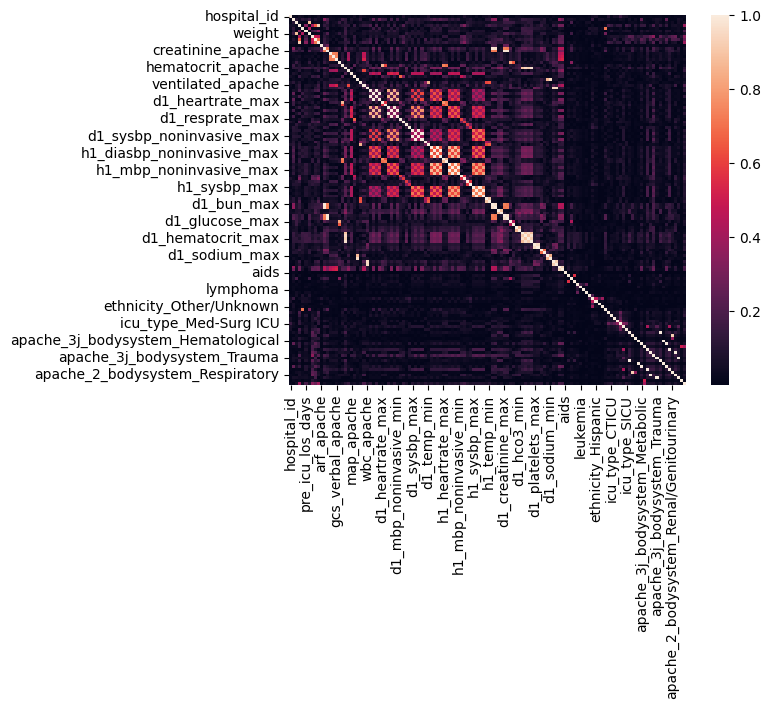

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [ ]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

The code is used to create an "upper" triangular matrix from the correlation matrix obtained previously. This step is typically performed to visualize the correlation matrix more effectively since the lower triangular part contains duplicate information.

Here's how the code works:

np.triu(np.ones(corr_matrix.shape), k=1) creates an upper triangular matrix of ones with the same shape as the correlation matrix. The k=1 parameter ensures that the diagonal and lower triangular elements are set to 0.

.astype(np.bool) converts the matrix of ones to a boolean matrix, where True represents the upper triangular elements and False represents the lower triangular elements.

corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) applies the boolean mask created in the previous step to the original correlation matrix. This operation sets all the lower triangular elements to NaN (Not a Number) since they are False in the boolean mask.

In [ ]:
upper

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,NaN,0.023046,0.014703,0.049647,0.033495,0.000866,0.027434,0.005550,0.017585,0.047964,...,0.017696,0.022047,0.007910,0.012637,0.018626,0.006110,0.022033,0.017696,0.004668,0.020737
age,NaN,NaN,0.102192,0.054517,0.123064,0.090182,0.148448,0.035333,0.088868,0.045835,...,0.062335,0.052025,0.004004,0.246271,0.010478,0.012919,0.015582,0.062335,0.030036,0.006091
bmi,NaN,NaN,NaN,0.028267,0.012171,0.009129,0.880394,0.008191,0.033975,0.030399,...,0.056298,0.029283,0.009318,0.058201,0.015827,0.040515,0.002916,0.056298,0.017213,0.054613
elective_surgery,NaN,NaN,NaN,NaN,0.018255,0.333029,0.032368,0.424241,0.652156,0.920698,...,0.041589,0.125978,0.040970,0.135688,0.015553,0.052176,0.058951,0.041589,0.028118,0.386465
height,NaN,NaN,NaN,NaN,NaN,0.019424,0.422126,0.011644,0.011771,0.019883,...,0.043975,0.005390,0.003674,0.017052,0.008897,0.027652,0.027620,0.043975,0.001528,0.041961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apache_2_bodysystem_Renal/Genitourinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.066276,0.038252,0.009852,0.034954
apache_2_bodysystem_Respiratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087691,0.022585,0.080130
apache_2_bodysystem_Trauma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013035,0.046248
apache_2_bodysystem_Undefined Diagnoses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011911


In [ ]:
#high_cor_threshold=0.9
high_cor_features=[col for col in upper.columns if any(upper[col]>=0.9)]

The code above identifies highly correlated features in the dataset. It calculates the correlation matrix using the Spearman method and then extracts the upper triangular part of the matrix. Next, it identifies features that have a correlation coefficient of 0.9 or higher with at least one other feature. These features are considered highly correlated and may lead to multicollinearity issues in predictive models.

In [ ]:
high_cor_features

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [ ]:
len(high_cor_features)

32

In [ ]:
#dropping those highly correlated values
X1=X.drop(high_cor_features,axis=1)

In [ ]:
X.shape

(27795, 130)

In [ ]:
X1.shape

(27795, 98)

In [ ]:
X1.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,...,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0.0,...,0,0,0,0,0,0,1,0,0,0
1,81,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0.0,...,0,0,0,0,0,1,0,0,0,0
5,83,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0.0,...,0,0,0,0,1,0,0,0,0,0
17,118,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0.0,...,0,0,0,0,0,1,0,0,0,0
23,118,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#confidence interval (when the data is normally distributed)

In [ ]:
import scipy.stats as st

In [ ]:
st.norm.interval(alpha=0.99,loc=np.mean(X1["age"]),scale=st.sem(X1["age"]))

(62.41074246719669, 62.92057611528217)

The output (62.41074246719669, 62.92057611528217) represents the lower and upper bounds of the 99% confidence interval for the mean of the "age" variable. This means that we are 99% confident that the true population mean of age lies within the range of approximately 62.41 and 62.92, based on the sample data in DataFrame X.

checking similary for 95% and 90%.

In [ ]:
st.norm.interval(alpha=0.95,loc=np.mean(X1["age"]),scale=st.sem(X1["age"]))

(62.471691549087915, 62.85962703339094)

In [ ]:
st.norm.interval(alpha=0.90,loc=np.mean(X1["age"]),scale=st.sem(X1["age"]))

(62.50287643058172, 62.828442151897136)

In [ ]:
#QQ plot is used to check the normal disribution

A QQ plot (Quantile-Quantile plot) is a graphical tool used to assess whether a dataset follows a normal distribution. It compares the quantiles of the data to the quantiles of a theoretical normal distribution. If the data points closely follow the 45-degree reference line on the QQ plot, it indicates that the data is approximately normally distributed.

In [ ]:
from statsmodels.graphics.gofplots import qqplot

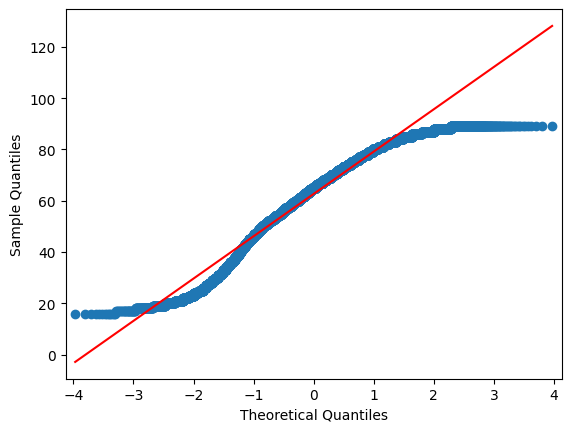

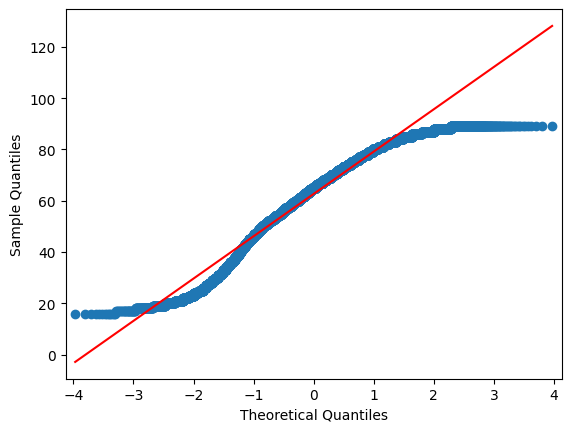

In [ ]:
qqplot(X1["age"],line="s")

<Axes: xlabel='age', ylabel='Count'>

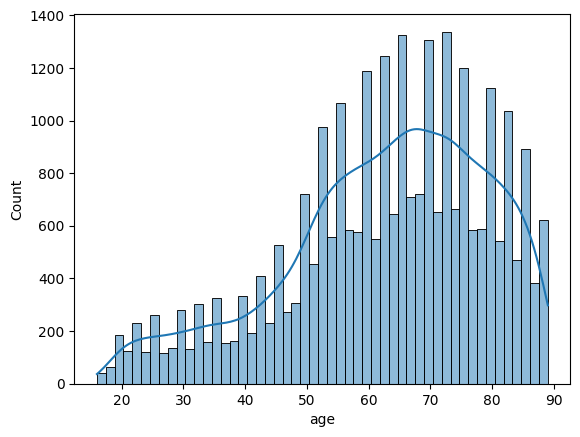

In [ ]:
sns.histplot(x=X1["age"],kde=True)

In [ ]:
st.shapiro(X1.age)

ShapiroResult(statistic=0.9591078758239746, pvalue=0.0)

In [ ]:
# as we know there are also some factor like temp, heamoglobin, hco3, glucose, potassium, platelets, wbc, and calcium which may have impact and they are also continous variables so lets check dependecy on them too

#but since some of these are correlated we will go with non co-related ones.

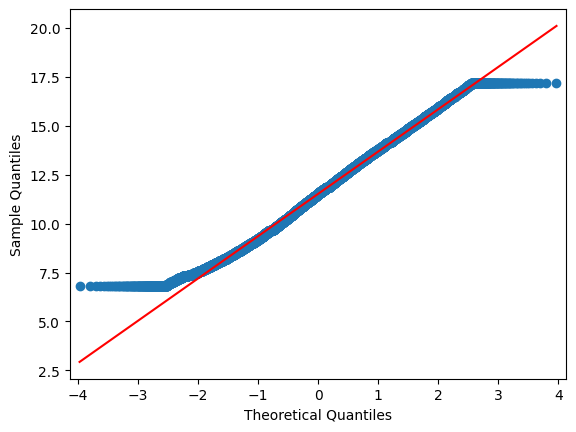

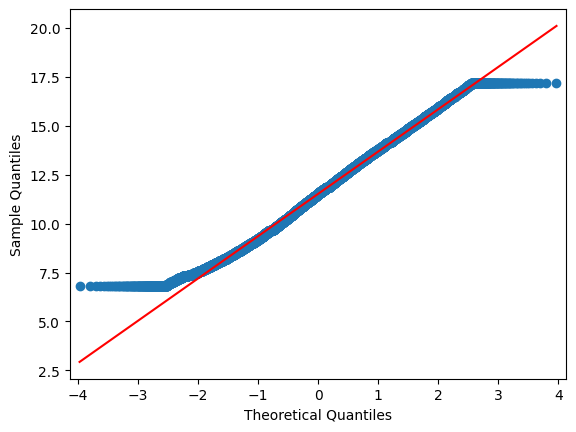

In [ ]:
qqplot(X1["d1_hemaglobin_max"],line="s")

<Axes: xlabel='d1_hemaglobin_max', ylabel='Count'>

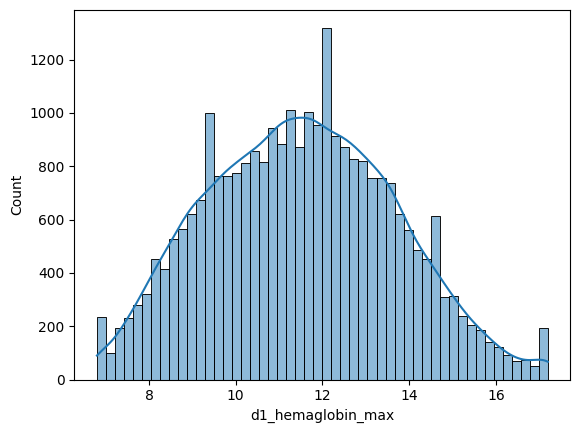

In [ ]:
sns.histplot(x=X1["d1_hemaglobin_max"],kde=True)

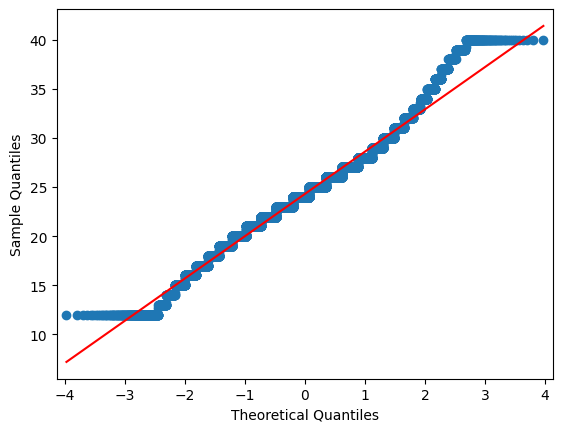

In [ ]:
qqplot(X1['d1_hco3_max'],line="s")
plt.show()

<Axes: xlabel='d1_hco3_max', ylabel='Count'>

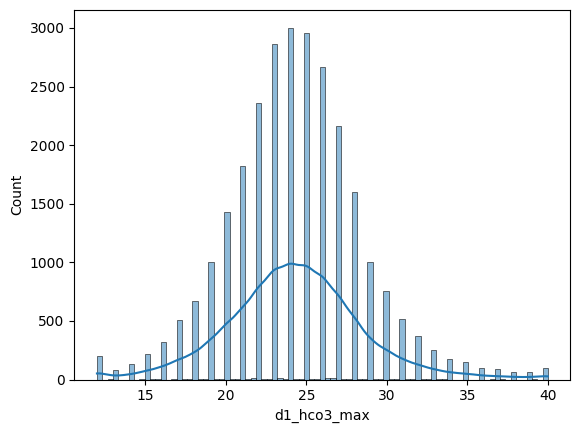

In [ ]:
sns.histplot(x=X1["d1_hco3_max"],kde=True)

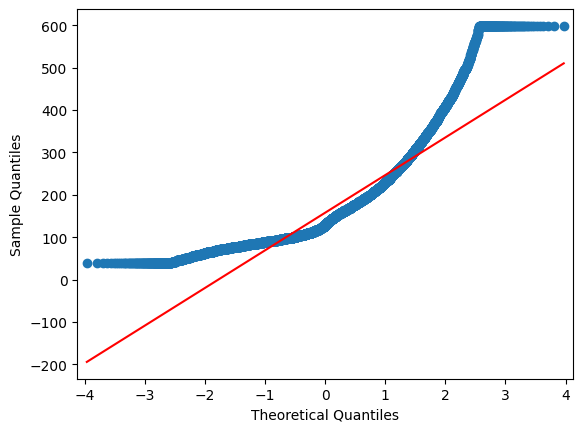

In [ ]:
qqplot(X1['glucose_apache'],line="s")
plt.show()

<Axes: xlabel='glucose_apache', ylabel='Count'>

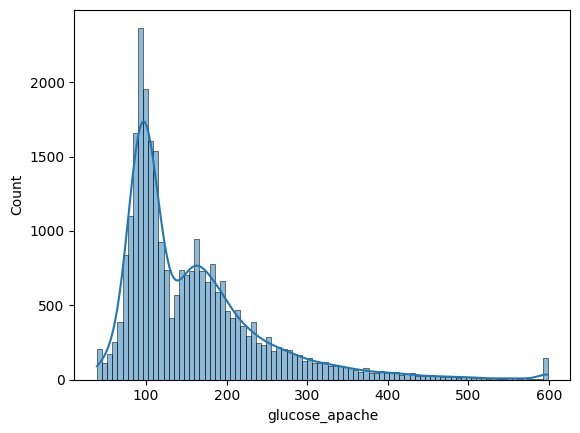

In [ ]:
sns.histplot(x=X1["glucose_apache"],kde=True)

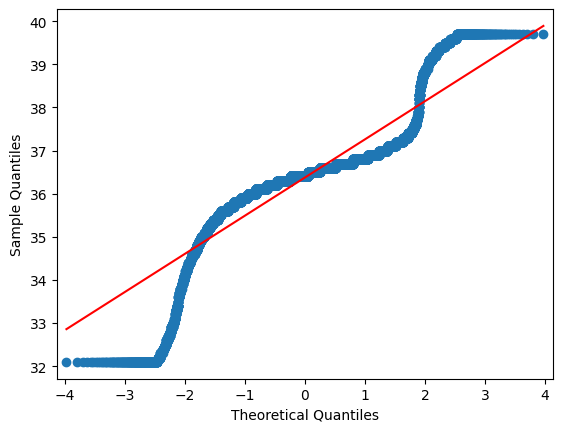

In [ ]:
qqplot(X1['temp_apache'],line="s")
plt.show()



<Axes: xlabel='temp_apache', ylabel='Count'>

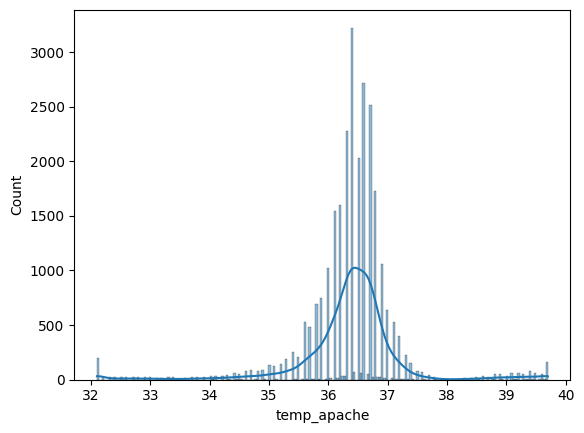

In [ ]:
sns.histplot(x=X1["temp_apache"],kde=True)

In [ ]:
#lets check partial dependency for above variables

Checking partial dependence involves understanding the relationship between a target variable and one or more independent variables in a machine learning model. It helps us visualize and interpret how the target variable changes with changes in the independent variables while holding all other variables constant.

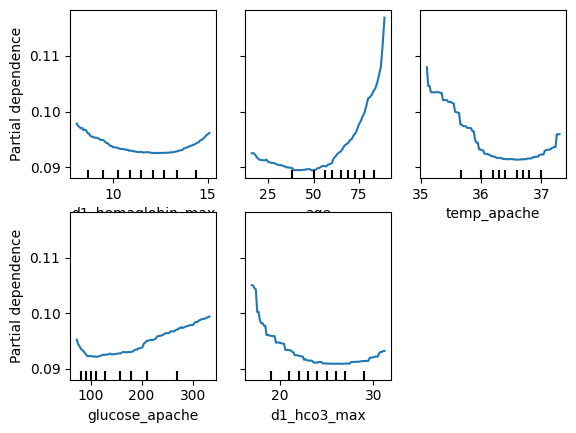

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(X1,Y)
disp1=PartialDependenceDisplay.from_estimator(model,X1,["d1_hemaglobin_max","age","temp_apache","glucose_apache","d1_hco3_max"])
plt.show()

In [ ]:
# now lets see what are the best features to know more about our data and how it will help us in analysis/interpretation

The best features help us to know more about our data and their role in analysis and interpretation depend on the specific problem, the nature of the data, and the goals of the analysis.

identifying the best features is a crucial step in data analysis and modeling. It can enhance model performance, lead to meaningful insights, and provide a better understanding of the underlying data and the problem being studied.

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

In [ ]:
bestfeatures=SelectKBest(score_func=mutual_info_classif)
best_features=bestfeatures.fit(X1,Y)

bestfeatures = SelectKBest(score_func=mutual_info_classif): You create an instance of the SelectKBest class and pass the mutual_info_classif function as the score_func argument. The mutual_info_classif is a function from scikit-learn that computes the mutual information between each feature and the target variable (Y) for classification problems.

best_features = bestfeatures.fit(X1, Y): You fit the SelectKBest instance on the feature matrix X1 and the target variable Y. During the fitting process, the mutual information scores between each feature and the target variable are computed.

In [ ]:
best_features

SelectKBest(score_func=<function mutual_info_classif at 0x7843e08ff9a0>)

In [ ]:
dfscores=pd.DataFrame(best_features.scores_)
dfscores

,0
0,0.004982
1,0.007266
2,0.000000
3,0.005566
4,0.001810
...,...
93,0.001046
94,0.003440
95,0.000000
96,0.000000


In [ ]:
dfcolumns=pd.DataFrame(X1.columns)

In [ ]:
#concating the two dataframe
features_score=pd.concat([dfcolumns,dfscores],axis=1)
features_score

,0,0
0,hospital_id,0.004982
1,age,0.007266
2,bmi,0.000000
3,elective_surgery,0.005566
4,height,0.001810
...,...,...
93,apache_3j_bodysystem_Respiratory,0.001046
94,apache_3j_bodysystem_Sepsis,0.003440
95,apache_3j_bodysystem_Trauma,0.000000
96,apache_2_bodysystem_Undefined Diagnoses,0.000000


In [ ]:
features_score.columns=["Features","Score"]
features_score

,Features,Score
0,hospital_id,0.004982
1,age,0.007266
2,bmi,0.000000
3,elective_surgery,0.005566
4,height,0.001810
...,...,...
93,apache_3j_bodysystem_Respiratory,0.001046
94,apache_3j_bodysystem_Sepsis,0.003440
95,apache_3j_bodysystem_Trauma,0.000000
96,apache_2_bodysystem_Undefined Diagnoses,0.000000


In [ ]:
best_features=features_score.nlargest(20,"Score")
best_features

,Features,Score
64,apache_4a_hospital_sepsis_prob,0.088296
8,apache_3j_diagnosis,0.037722
13,gcs_motor_apache,0.037361
7,apache_2_diagnosis,0.035487
14,gcs_verbal_apache,0.030636
12,gcs_eyes_apache,0.029381
23,ventilated_apache,0.025833
36,d1_sysbp_min,0.023752
22,temp_apache,0.023469
38,d1_temp_min,0.022682


 selecting the top 20 rows (features) from the features_score DataFrame with the largest "Score" values.
  The nlargest() function sorts the DataFrame in descending order based on the "Score" column and returns the top 20 rows.
  

In [ ]:
#lets visualize these above best features

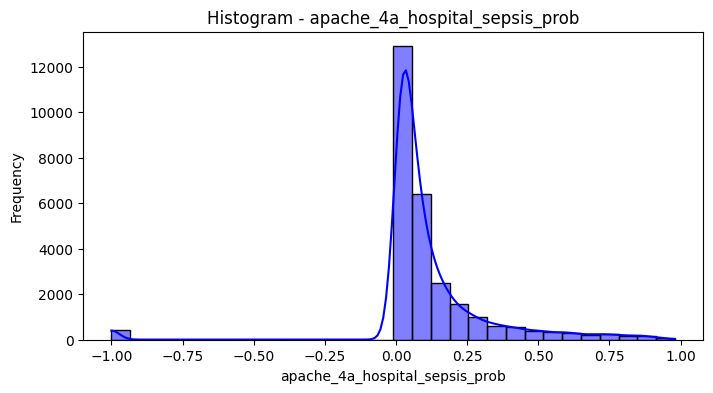

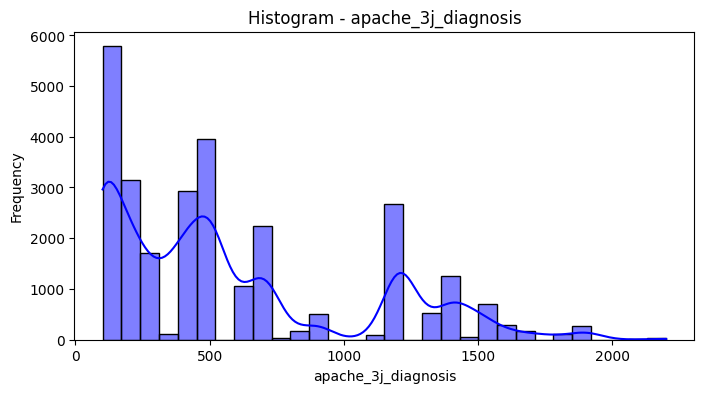

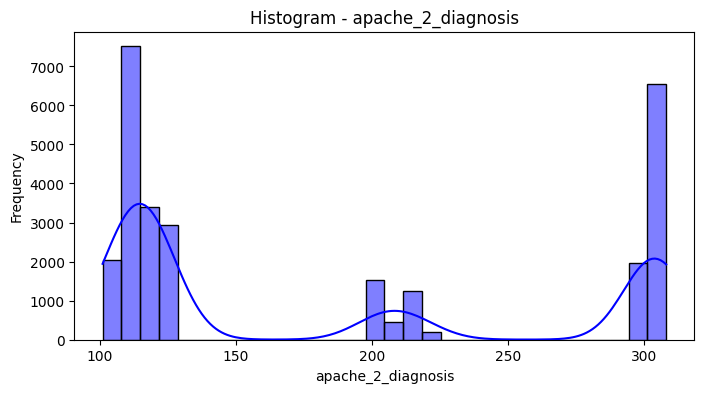

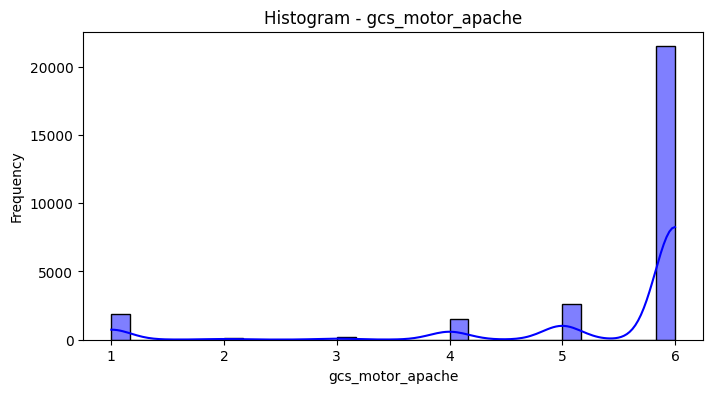

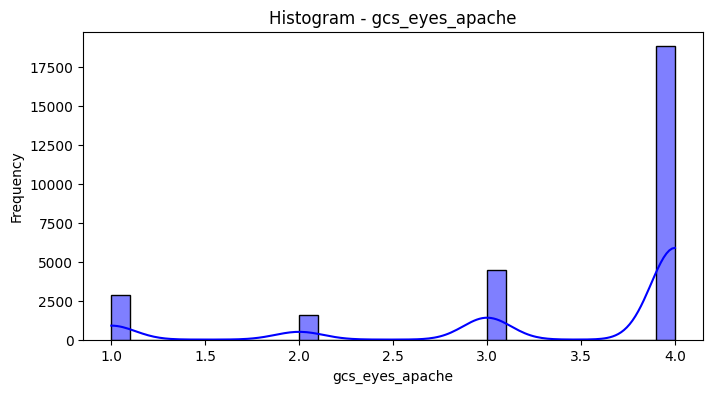

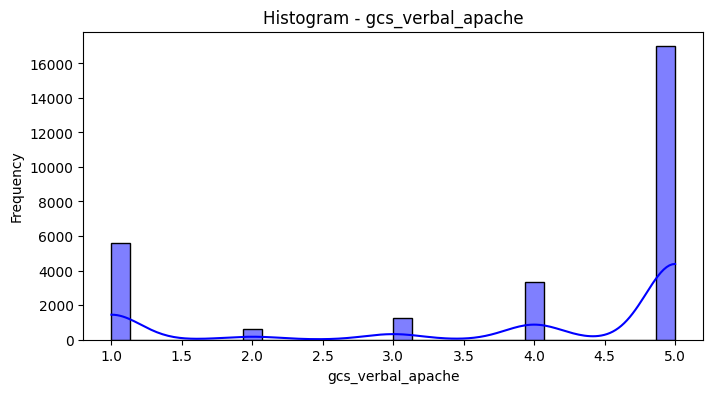

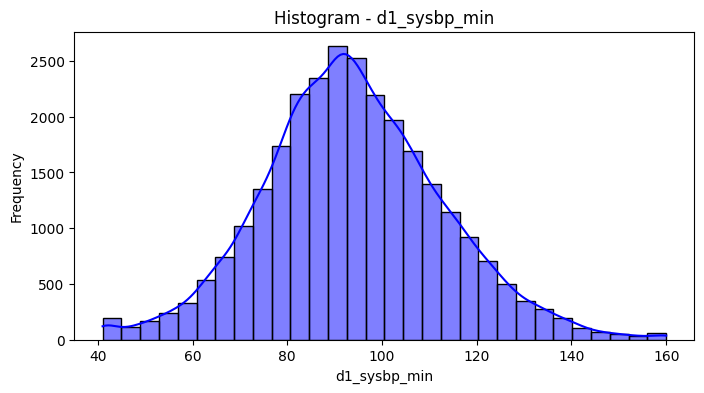

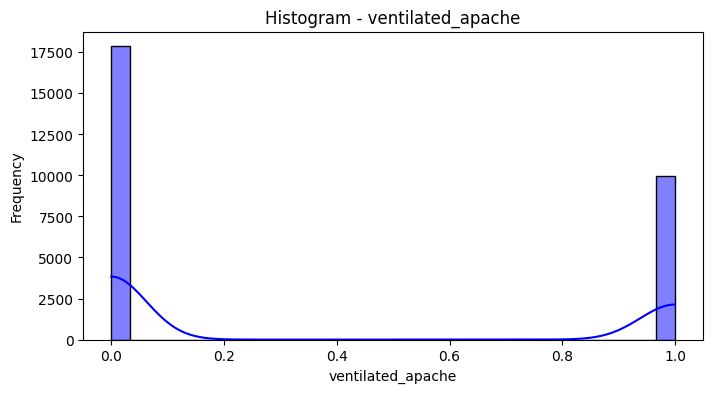

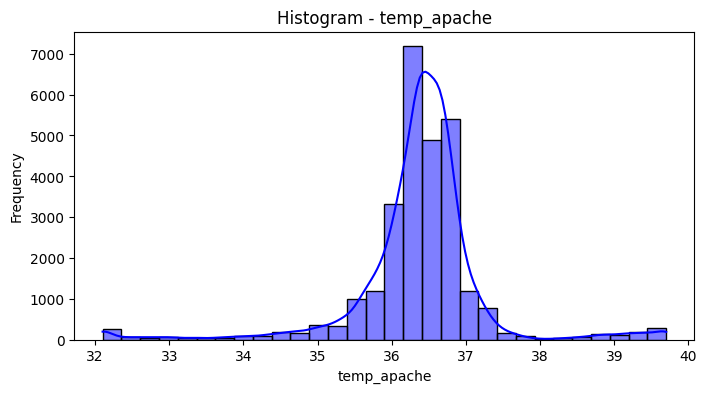

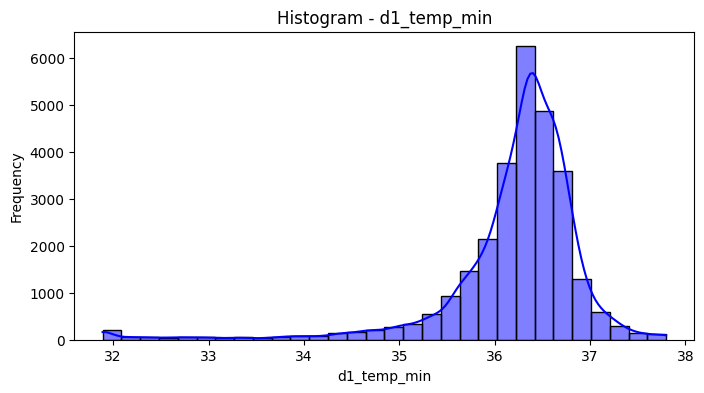

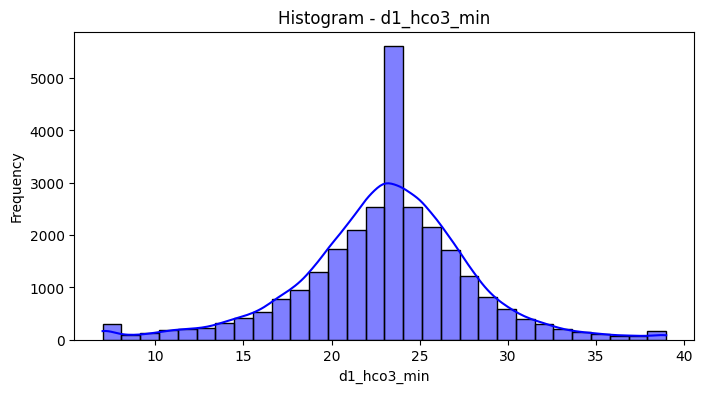

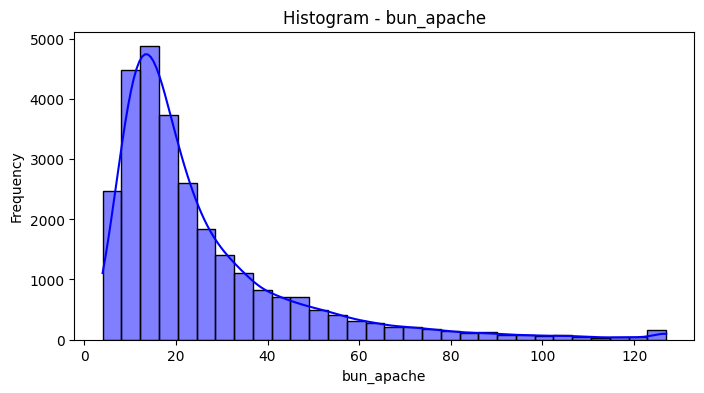

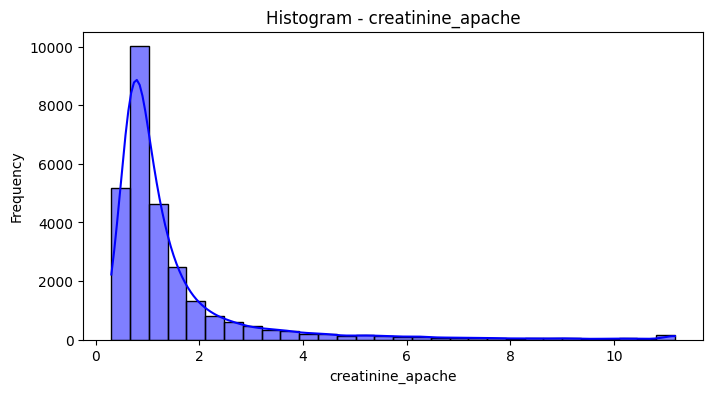

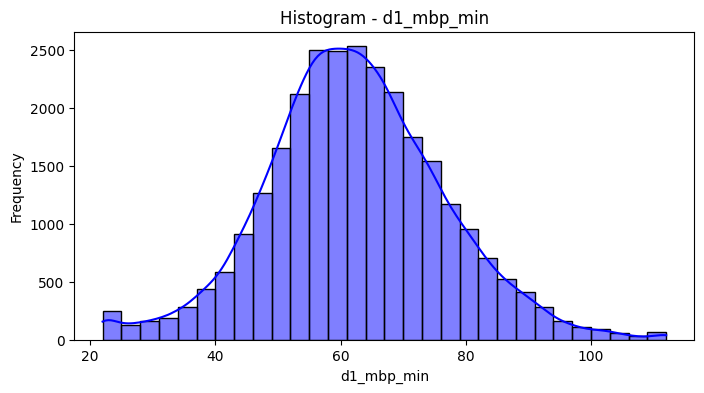

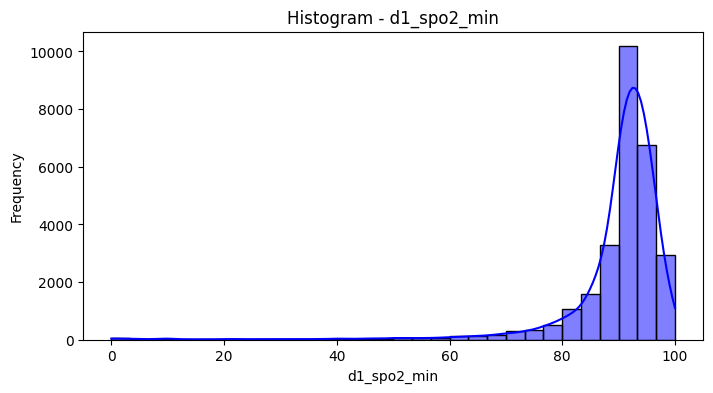

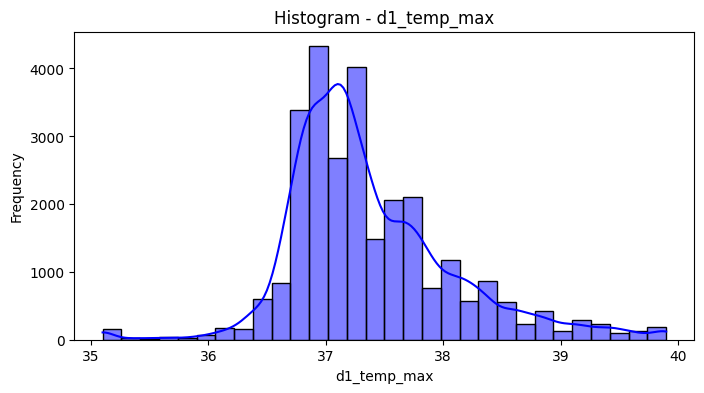

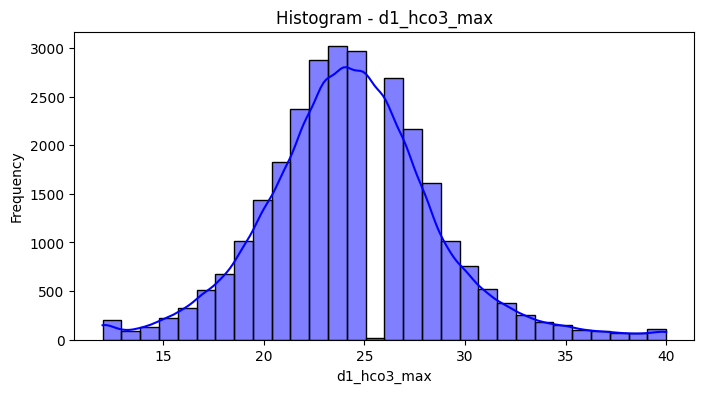

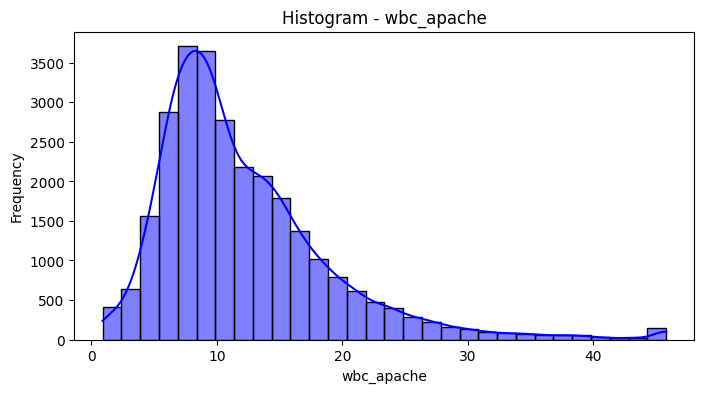

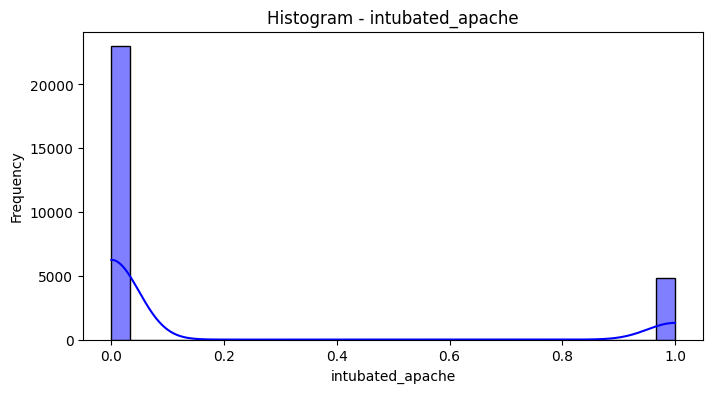

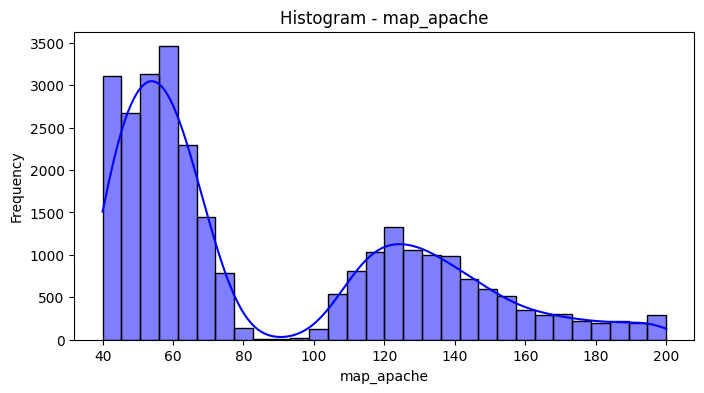

In [ ]:


numeric_features = ['apache_4a_hospital_sepsis_prob', 'apache_3j_diagnosis', 'apache_2_diagnosis',
                    'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'd1_sysbp_min',
                    'ventilated_apache', 'temp_apache', 'd1_temp_min', 'd1_hco3_min', 'bun_apache',
                    'creatinine_apache', 'd1_mbp_min', 'd1_spo2_min', 'd1_temp_max', 'd1_hco3_max',
                    'wbc_apache', 'intubated_apache', 'map_apache']

# Plot histograms for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df1, x=feature, bins=30, kde=True, color='blue')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram - {feature}')
    plt.show()


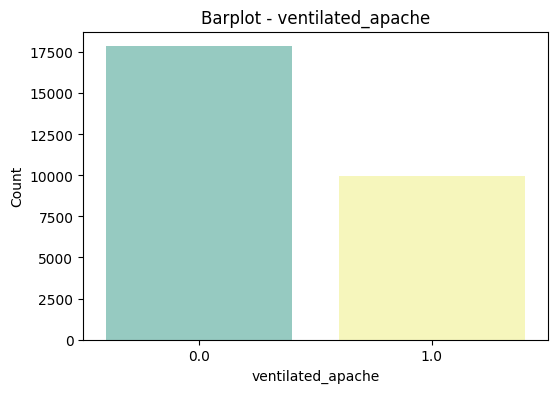

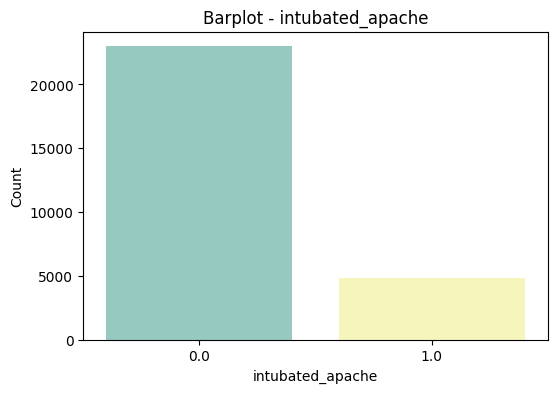

In [ ]:
# Select the best categorical features based on scores
categorical_features = ['ventilated_apache', 'intubated_apache']

# Plot barplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df1, x=feature, palette='Set3')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Barplot - {feature}')
    plt.show()


Text(0.5, 1.0, 'apache_3j_diagnosis vs. Sepsis Shock')

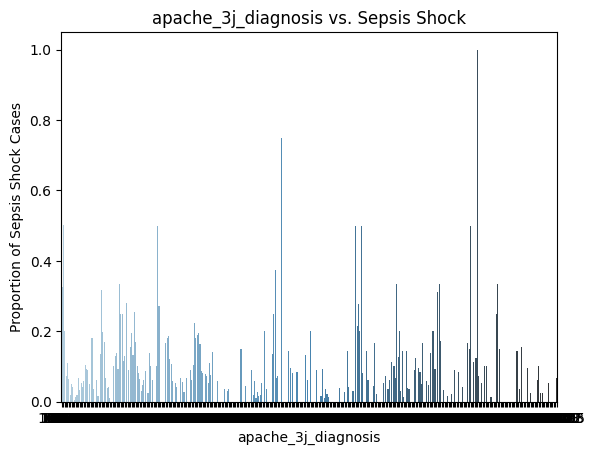

In [ ]:
df1['sepsis_shock'] = df1['septic_shock'].astype(int)
sns.barplot(x='apache_3j_diagnosis', y='sepsis_shock', data=df1, ci=None, palette='Blues_d')
plt.xlabel('apache_3j_diagnosis')
plt.ylabel('Proportion of Sepsis Shock Cases')
plt.title("apache_3j_diagnosis vs. Sepsis Shock")

In [ ]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X1)
X_scaled=pd.DataFrame(X_scaled,columns=X1.columns)
X_scaled.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,...,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.574257,0.712329,0.148859,0.0,0.738140,0.011390,0.239484,0.057971,0.190949,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.391089,0.835616,0.237400,0.0,0.390478,0.017132,0.214383,0.033816,0.048571,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.400990,0.698630,0.240043,0.0,0.912828,0.003346,0.416554,0.966184,0.143807,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.574257,0.410959,0.207679,0.0,0.520637,0.003336,0.230665,0.033816,0.048571,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.574257,0.972603,0.134394,0.0,0.738140,0.078379,0.222524,0.057971,0.190492,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Scaling is a common preprocessing step in machine learning that brings all features to the same scale, typically between 0 and 1, to ensure that they have equal importance in the model and to avoid any dominance of features with larger scales.

In [ ]:
X_scaled.corrwith(Y)

hospital_id                               -0.018689
age                                       -0.009518
bmi                                        0.006779
elective_surgery                          -0.011217
height                                    -0.011496
                                             ...   
apache_3j_bodysystem_Respiratory           0.016263
apache_3j_bodysystem_Sepsis                0.001033
apache_3j_bodysystem_Trauma                0.019267
apache_2_bodysystem_Undefined Diagnoses   -0.018963
apache_2_bodysystem_Undefined diagnoses   -0.004297
Length: 98, dtype: float64

The result of X_scaled.corrwith(Y) will be a Pandas Series where each element represents the correlation coefficient between a feature and the target variable Y. A positive correlation value indicates a positive relationship between the feature and the target variable, while a negative correlation value indicates a negative relationship. The magnitude of the correlation coefficient represents the strength of the relationship, where values closer to 1 or -1 indicate a stronger correlation. A correlation value of 0 indicates no linear relationship between the feature and the target variable.



In [ ]:
#spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [ ]:
#model building process

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [ ]:
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()

In [ ]:
 for model in[rf,bg,dt,svc]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_train,Y_train,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)

    # print of metrics
    print("ROC AUC",roc_auc_test_cv)
    print("F1 MACRO",f1_test_cv)
    print("PRECISION MACRO",precisio_test_cv)
    print("RECALL MACRO",Recall_test_cv)

Performance of RandomForestClassifier()
ROC AUC 0.8768
F1 MACRO 0.6573
PRECISION MACRO 0.8215
RECALL MACRO 0.614
Performance of BaggingClassifier()
ROC AUC 0.8194
F1 MACRO 0.6645
PRECISION MACRO 0.7652
RECALL MACRO 0.6266
Performance of DecisionTreeClassifier()
ROC AUC 0.6453
F1 MACRO 0.6399
PRECISION MACRO 0.6351
RECALL MACRO 0.6453
Performance of SVC()
ROC AUC 0.8252
F1 MACRO 0.6144
PRECISION MACRO 0.8271
RECALL MACRO 0.5805


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in[rf,bg,dt,svc]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')

    # print of metrics
    print("confusion matrix \n",cm)
    print("======="*3)
    print("Accuracy \n",AS)
    print("======="*3)
    print("Classification Report \n",CR)
    print("======="*3)
    print("ROC_AUC \n",ROC)
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS)
    print("PRECISION MACRO",precisio_test_cv)
    print("RECALL MACRO",Recall_test_cv)

Performance of RandomForestClassifier()
confusion matrix 
 [[4997   55]
 [ 374  133]]
Accuracy 
 0.9228278467350243
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.71      0.26      0.38       507

    accuracy                           0.92      5559
   macro avg       0.82      0.63      0.67      5559
weighted avg       0.91      0.92      0.91      5559

ROC_AUC 
 0.625720319329857
MACRO Precision_recall_F1 
 (0.8189067965472574, 0.625720319329857, 0.6707874188033244, None)
PRECISION MACRO 0.8271
RECALL MACRO 0.5805
Performance of BaggingClassifier()
confusion matrix 
 [[4947  105]
 [ 363  144]]
Accuracy 
 0.9158121964382083
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5052
           1       0.58      0.28      0.38       507

    accuracy                           0.92      5559
   macro avg   

we can make the following conclusions about the performance of the different classifiers:

RandomForestClassifier:

Accuracy: 92.28%
Precision, Recall, and F1-score for class 1 (sepsis shock) are relatively low, indicating that the model struggles to correctly predict the positive class.
ROC_AUC: 0.63, which indicates a moderate level of discrimination between positive and negative classes.
BaggingClassifier:

Accuracy: 91.58%
Similar to RandomForestClassifier, the model's performance on class 1 (sepsis shock) is relatively lower compared to class 0.
ROC_AUC: 0.63, which is again moderate in distinguishing between positive and negative classes.
DecisionTreeClassifier:

Accuracy: 87.35%
The Decision Tree model also struggles to predict class 1 (sepsis shock), resulting in a lower F1-score for this class.
ROC_AUC: 0.64, indicating some discrimination capability.
SVC (Support Vector Classifier):

Accuracy: 91.87%
Like the previous models, SVC shows challenges in correctly predicting class 1 (sepsis shock).
ROC_AUC: 0.59, which is the lowest among the models, indicating limited discrimination ability.



In conclusion, all four classifiers exhibit some difficulties in correctly predicting the positive class (sepsis shock). The RandomForestClassifier performs relatively better compared to others, but there is still room for improvement.





In [ ]:
#balancing the data set
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

Balancing the dataset is a crucial step, especially when dealing with imbalanced classes like in the case of sepsis shock prediction. Imbalanced data occurs when one class (in this case, sepsis shock) is significantly more frequent than the other class (no sepsis shock).

as we can see that our model are strugling to predict correctly, balancing the dataset might bring us good prediction results

In [ ]:
smote=SMOTE()
under=RandomUnderSampler()
# we only balance our training dataset

In [ ]:
# smote approach
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [ ]:
Y_train.value_counts()

0    20207
1     2029
Name: septic_shock, dtype: int64

In [ ]:
Y_train_smote.value_counts()

0    20207
1    20207
Name: septic_shock, dtype: int64

In [ ]:
X_train_smote.shape

(40414, 98)

In [ ]:
# undersampling approach
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [ ]:
Y_train_under.value_counts()

0    2029
1    2029
Name: septic_shock, dtype: int64

In [ ]:
X_train_under.shape

(4058, 98)

In [ ]:
#lets compare and chcek which sampling technique is best for us


In [ ]:
smote = SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()
under=RandomUnderSampler()

In [ ]:
for model in[rf,bg,dt,svc]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    for balancer in[smote,adasyn,over,border,under]:
        X_train_1,Y_train_1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')

        # print of metrics
        print("confusion matrix \n",cm)
        print("======="*3)
        print("Accuracy \n",AS)
        print("======="*3)
        print("Classification Report \n",CR)
        print("======="*3)
        print("ROC_AUC \n",ROC)
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
    #print("PRECISION MACRO",precisio_test_cv)
    #print("RECALL MACRO",Recall_test_cv)

Performance of RandomForestClassifier()
confusion matrix 
 [[4766  286]
 [ 275  232]]
Accuracy 
 0.8990825688073395
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5052
           1       0.45      0.46      0.45       507

    accuracy                           0.90      5559
   macro avg       0.70      0.70      0.70      5559
weighted avg       0.90      0.90      0.90      5559

ROC_AUC 
 0.7004912226454343
MACRO Precision_recall_F1 
 (0.6966618898775216, 0.7004912226454343, 0.6985499247244529, None)
confusion matrix 
 [[4758  294]
 [ 273  234]]
Accuracy 
 0.8980032379924446
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5052
           1       0.44      0.46      0.45       507

    accuracy                           0.90      5559
   macro avg       0.69      0.70      0.70      5559
weighted avg       0.90      0.90    

 we can make the following conclusions after balancing the dataset:

RandomForestClassifier: After balancing the dataset, the accuracy improved to around 90%. The macro-average precision, recall, and F1-score are all around 0.70, indicating a decent overall performance.

BaggingClassifier: Similar to the RandomForestClassifier, the BaggingClassifier also achieved an accuracy of around 90%. The macro-average precision, recall, and F1-score are also around 0.70, suggesting a good overall performance.

DecisionTreeClassifier: The DecisionTreeClassifier's performance improved after balancing the dataset, with an accuracy of around 85%. However, its macro-average precision, recall, and F1-score are relatively lower at around 0.63.

SVC (Support Vector Classifier): The SVC achieved an accuracy of around 85% after balancing the dataset. Its macro-average precision, recall, and F1-score are also around 0.66, indicating a reasonable performance.

Overall, balancing the dataset helped improve the performance of the classifiers, especially for RandomForestClassifier and BaggingClassifier. However, the DecisionTreeClassifier and SVC still show lower performance compared to the ensemble models. Further tuning of hyperparameters and using more sophisticated techniques could potentially lead to better results.

In conclusion, by balancing the dataset, we have achieved better accuracy and a more balanced prediction for the sepsis shock class, which is essential in the context of medical diagnosis.